## Прогнозирование оттока клиентов фитнес-центра

### Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1)
- [Предобработка данных](#step2)
- [Исследовательский анализ данных](#step3)
- [Модель прогнозирования оттока клиентов](#step4)
- [Кластеризация и портреты клиентов](#step5)
- [Общий вывод](#step6)

---

### План исследования
- Загрузить данные, получить первичное представление о данных и проверить на пропуски и дубликаты.

---

- Изучить средние значения и стандартные отклонения;
- Посмотреть на средние значения признаков в двух группах;
- Построить столбчатые гистограммы и распределения признаков для двух групп;
- Построить матрицу корреляции.

---

- Построить модель бинарной классификации пользователей с целевым признаком;
- Разбить данные на обучающую и валидационную выборку;
- Обучить модель на train-выборке для логической регрессии и для случайного леса;
- Оценить метрики accuracy, precision и recall, и сравнить модели по ним.

---

- Стандартизировать данные;
- Построить матрицу расстояний и нарисовать дендограмму;
- Обучить модель кластеризации для пяти кластеров;
- Определить средние значения признаков для кластеров;
- Построить распределения признаков для кластеров;
- Для каждого кластера посчитать долю оттока клиентов.

---

- Написать общий вывод и предложить рекомендации для стратегии взаимодействия с клиентами.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# импортируем данные
gym = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Проект 11. Прогнозирование оттока клиентов. Фитнес-центр/gym_churn.csv')

In [4]:
# первичное представление
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# первые 5 строк
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
# посмотрим уникальные значения
for column in gym.columns:
    print(gym[column].value_counts())

1    2041
0    1959
Name: gender, dtype: int64
1    3381
0     619
Name: Near_Location, dtype: int64
0    2053
1    1947
Name: Partner, dtype: int64
0    2766
1    1234
Name: Promo_friends, dtype: int64
1    3614
0     386
Name: Phone, dtype: int64
1     2207
12     960
6      833
Name: Contract_period, dtype: int64
0    2351
1    1649
Name: Group_visits, dtype: int64
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64
135.756722    1
97.623617     1
82.487277     1
17.911351     1
74.882931     1
             ..
163.080276    1
133.640108    1
9.838696      1
134.699410    1
357.046942    1
Name: Avg_additional_charges_total, Length: 4000, dtype: int64
1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0   

In [7]:
# проверим на пропуски
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [8]:
# проверим на дубликаты
gym.duplicated().sum()

0

#### Наименования столбцов датасета и их описание:
- Churn — факт оттока в текущем месяце;
- gender — пол;
- Near_Location — проживание или работа в районе, где находится фитнес-центр;
- Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- Phone — наличие контактного телефона;
- Age — возраст;
- Lifetime — время с момента первого обращения в фитнес-центр (в месяцах).
- Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах);
- Group_visits — факт посещения групповых занятий;
- Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;
- Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;
- Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

### <a id='step2'>Предобработка данных</a>

In [9]:
# приведем названия столбцов к нижнему регистру
gym.columns = gym.columns.str.lower()

In [10]:
# значения столбца month_to_end_cotract приведем к целочисленному типу
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int')

In [11]:
# проверим
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


### <a id='step3'>Исследовательский анализ данных</a>

In [12]:
# посмотрим на данные через describe
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Наши клиенты поровну распределены между мужчинами и женщинами;
- Почти 85% наших клиентов проживают или работают рядом с фитнес-центром;
- Почти половина клиентов работает в компаниях-партнерах и получает персональные предложения;
- Только 31% клиентов пришли по акции "приведи друга";
- В среднем, срок действия абонемента составляет 5 месяцев;
- Групповые занятия пользуются спросом у 41% клиентов:
- Средний возврат клиентов 29 лет;
- В среднем, клиенты тратят 150 рублей на дополнительные услуги;
- Время, оставшееся до окончания действующего абонемента - 4 месяца;
- Время, прошедшее с первого момента обращения в офис - 4 месяца;
- В среднем, клиент посещает фитнес-центр 2 раза в неделю;
- В среднем, за последний месяц посещаемость клиентами фитнес-центра - 2 раза.

In [13]:
# посмотрим на средние значения признаков оставшихся групп и ушедших в отток
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- Гендерная принадлежность одинакова в обоих случаях;
- Факт проживания в районе, расположенном надалеко от фитнес-центра, положительно влияет на удержание клиента;
- Наличие компании-партнера и предоставление персональных предложений для работников положительно влияет на удержание клиента;
- Участие в акции "приведи друга" положительное влияет на удержание клиента. Как правило, заниматься в фитнес-центре проще в компании, а не в одиночку:
- Наличие контактного телефона одинаково в обоих случаях;
- Исходя из срока действия текущего абонемента можно сделать вывод, что отваливаются в основном те клиенты, которые не прозанимались и двух месяцев (классика). Те же, кто остался, занимаются шесть месяцев и больше;
- Групповые занятие положительно влияют на удержание клиента;
- Возвраст клиента не сильно влияет. Три года - это не очень большой разрыв, чтобы строить какие-то предположения.
- Если клиент пользуется дополнительными услугами фитнес-центра, то он с нами надолго;
- Чем больше времени осталось до окончания срока действия текущего абонемента, тем меньше вероятность, что клиент уйдет от нас;
- Как правило, большинство клиентов уходит в первые три месяца, а остаются те, кто прозанимался четыре и более месяцев;
- Среднее количество посещений в неделю играют большую роль. Принято считать, что оптимальное количество тренировок в неделю - 2 или 3;
- Среднее количество посещений в неделю за последний месяц подтверждает предыдущий пункт.

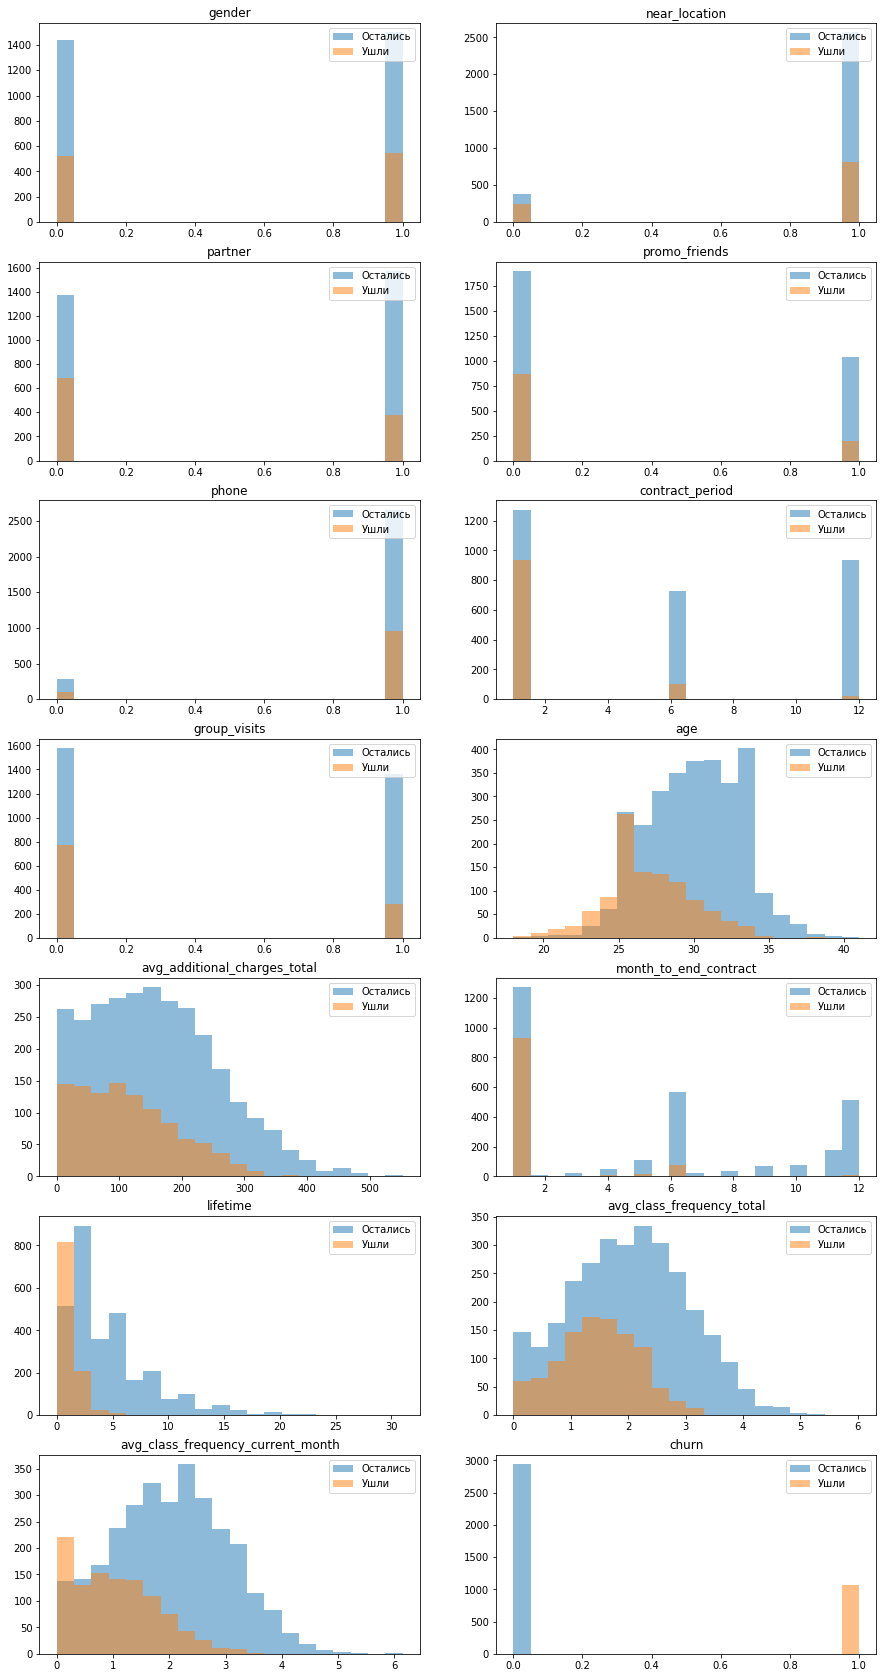

In [14]:
# нарисуем графики распределения признаков для оставшихся групп и ушедших в отток

gym_churn_0 = gym.query('churn == 0')
gym_churn_1 = gym.query('churn == 1')

# нарисуем график
fig, ax = plt.subplots((len(gym.columns)+1)//2, 2, figsize = (15, 30))
ax = ax.ravel()

for i in range(len(gym.columns)):
    col_name = gym.columns[i]
    range_hist = (gym[col_name].min(), gym[col_name].max())
    ax[i].hist(gym_churn_0[col_name], bins=20, range = range_hist, alpha = 0.5, label = 'Остались')
    ax[i].hist(gym_churn_1[col_name], bins=20, range = range_hist, alpha = 0.5, label = 'Ушли')
    ax[i].legend(loc='upper right')
    ax[i].set_title(col_name)
plt.show();

- Мужчин и женщин практически одинаковое количество в обеих группах;
- В отток уходят те, кто не проживает рядом с фитнес-центром. Из общего количества клиентов около тысячи не имеют фитнес-центра в районе проживания;
- Меньше склонны к оттоку клиенты, которые работают в компаниях-партнерах и получают персональные предложения;
- Клиенты, пришедшии по акции "приведи друга" с большей вероятностью становятся постоянными клиентами;
- Клиенты, оставшие номер телефона, с меньшей вероятность уходят в отток;
- С большей вероятностью уходят в отток клиенты, изначально оформившие абонемент на один месяц. Клиенты, изначально оформившие абонемент на срок от 6 месяц и больше становятся постоянными клиентами;
- Посещение групповых занятий способствует удержанию клиента;
- Больше остальных склонны становиться постоянными клиенты в возрасте от 26 до 34 лет;
- Клиенты, пользующиеся дополнительными услугами фитнес-центра в дальнейшем становятся постоянными клиентами;
- Чем больше времени остается до окончания срока действия текущего абонемента, тем меньше вероятность оттока;
- С момента первого обращения клиента в фитнес центр до превращения его в постоянного пользователя услуг, проходит от трех до шести месяцев;
- У клиентов, ушедших в отток, частота посещений фитнес-центра ниже, чем у тех, кто остался:
- За предыдущий месяц идентичные значения;
- ~75% клиентов остались пользоваться услугами фитнес-центра.

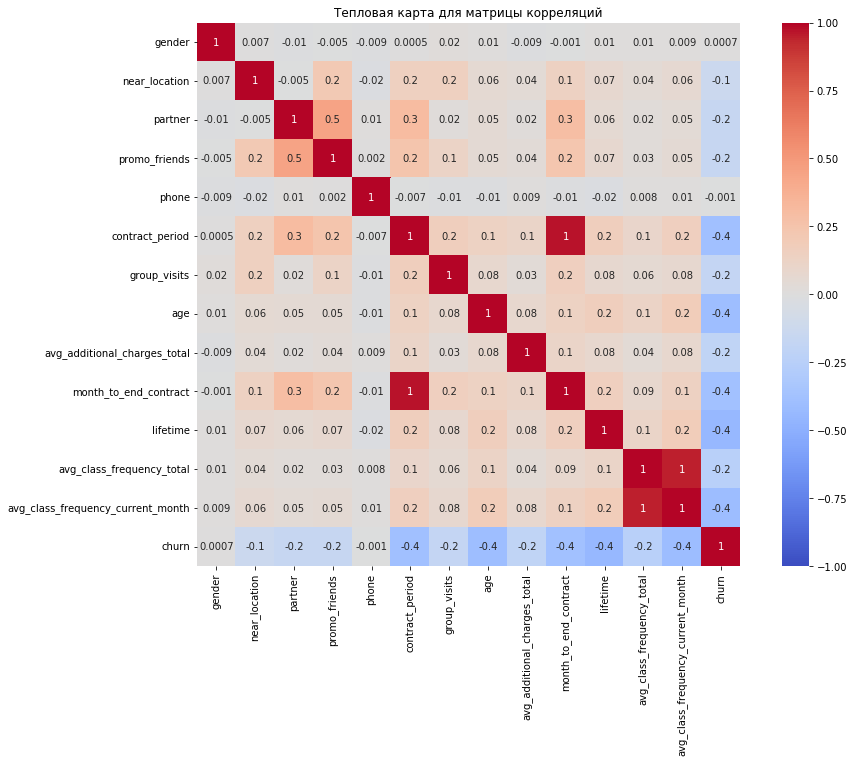

In [15]:
# матрица корреляций
cm = gym.corr() 

# нарисуем тепловую карту для матрицы корреляций
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True, square = True,\
            vmin = -1, vmax = 1, center = 0, fmt='.1g', cmap= 'coolwarm')
plt.title('Тепловая карта для матрицы корреляций')
plt.show();

#### Переменная churn и другие перменные
- Во всех случаях корреляция переменной churn с остальными переменными является отрицательной;
- Переменная churn наименее коррелируют с перменными gender и phone;
- Наиболее сильно отрицательная корреляция - (-0.4) - выражена с переменными contract_period, age, month_to_end_contract, lifetime, avg_class_frequency_current_month;
- Также отрицательная корреляция - (-0.2) - выражена с переменными parther, promo_friends, group_visits, avg_additional_charges_total и avg_class_frequency_total.

---

#### Прочие корреляции
- Самая сильная положительная корреляция (1) между переменными month_to_end_contract и contract_period, а также парами переменных avg_class_frequency_total и avg_class_frequency_total_month;
- Сильная корреляция - (0.5) - между переменными partner и promo_friend. Чем больше клиентов пришли по акции "приведи друга", тем больше приходит клиентов из компаний-партнеров. Верно и обратное.

### <a id='step4'>Модель прогнозирования оттока клиентов</a>

In [16]:
# функция для вывода метрик accuracy, precision и recall/
# логистическая регрессия и случайный лес

# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

# разделим данные на признаки и (X) и целевую переменную (y)
X = gym.drop('churn', axis=1)
y = gym['churn']

# разделим модель на обучающую и валидационную выборку 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающие и валидацонные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# логистическая регрессия

# алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state = 0, solver = 'lbfgs')

# обучение модели
lr_model.fit(X_train_st, y_train)
# прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

# случайный лес

# алгоритм для модели случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучение модели
rf_model.fit(X_train_st, y_train)

# прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)

# вывод метрик для логистической регрессии
print_all_metrics(y_test, lr_predictions, lr_probabilities , title= 'Метрики для модели логистической регрессии:')

# вывод метрик для случайного леса
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


- Исходя из полученных результатов метрик accuracy, precision и recall можно сделать вывод, обе модели функционируют хорошо, т.к между ними отсутствует значительная разница.

### <a id='step5'>Кластеризация и портреты клиентов</a>

In [17]:
# дендограммы и linkage
from scipy.cluster.hierarchy import dendrogram, linkage

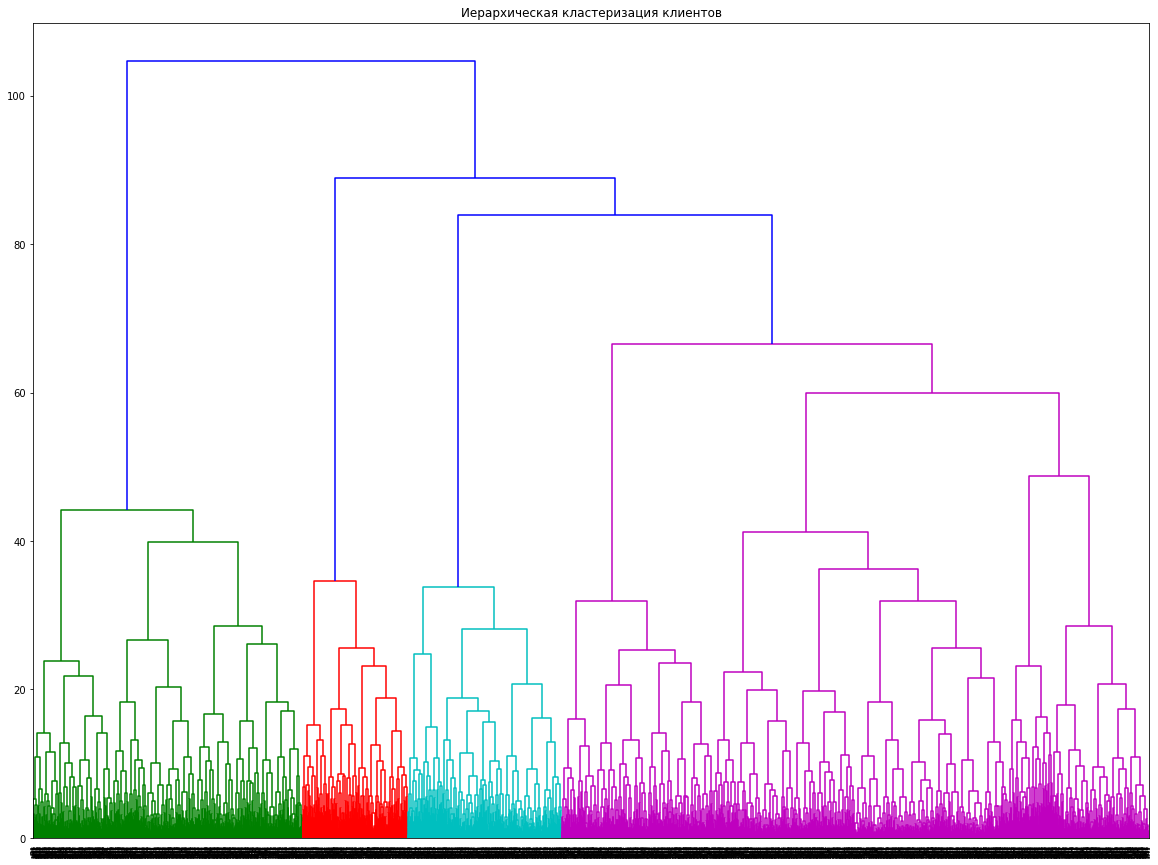

In [18]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# основа для дендограммы
linked = linkage(X_sc, method = 'ward')

# гарисуем дендограмму
plt.figure(figsize=(20, 15))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show();

- Правильным решением будет разделить клиентов на четыре кластера.

In [19]:
# для кластеров
from sklearn.cluster import KMeans

# обучим модель кластеризации на основании K-means

# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# пять кластеров
km = KMeans(n_clusters = 5, random_state = 0)

# применение алгоритма к кластерам и формирование вектора
labels = km.fit_predict(gym.drop(columns = ['churn'], axis = 1))

gym['cluster_km'] = labels

# статистика по средним значениям признаков в каждом кластере
print(gym.drop('churn', axis=1).groupby(['cluster_km']).mean())

              gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.515534       0.838835  0.452427       0.279612  0.897087   
1           0.510903       0.844237  0.495327       0.319834  0.902388   
2           0.521246       0.881020  0.511331       0.347025  0.898017   
3           0.468635       0.856089  0.516605       0.332103  0.926199   
4           0.507767       0.825243  0.488350       0.294175  0.908738   

            contract_period  group_visits        age  \
cluster_km                                             
0                  4.308738      0.405825  28.971845   
1                  4.751817      0.423676  29.402908   
2                  5.400850      0.433428  29.344193   
3                  5.822878      0.431734  29.845018   
4                  4.194175      0.388350  28.908738   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km 

- Наилучшие значения в четвертом кластере;
- Наихудшие значения в пятом кластере.

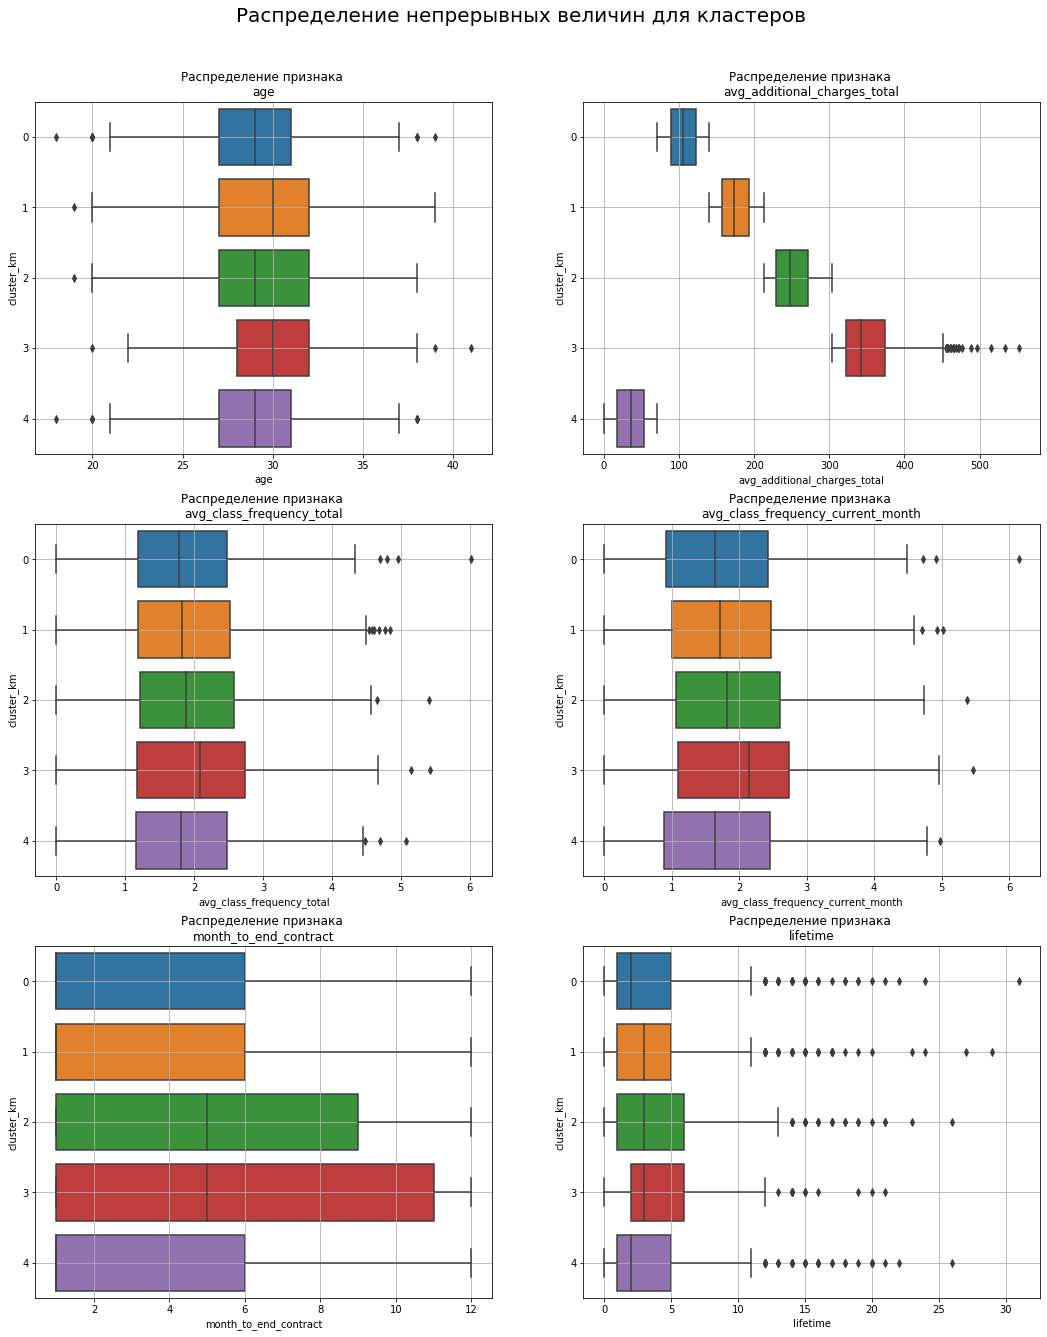

In [20]:
# нарисуем графики распределения признаков по кластерам для непрерывных величин 

# непрерывные величины
cont_features = ['age', 'avg_additional_charges_total', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month', 'month_to_end_contract', 'lifetime']

# нарисуем графики
for i, col in enumerate(cont_features):
    plt.subplot(3, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(18, 22)
    sns.boxplot(data = gym.drop('churn', axis=1), x = col, y = 'cluster_km', orient = 'h')
    plt.grid(True)
    plt.title('Распределение признака \n'+ str(col))
    fig.suptitle('Распределение непрерывных величин для кластеров', y = .94, fontsize=20)
plt.show();

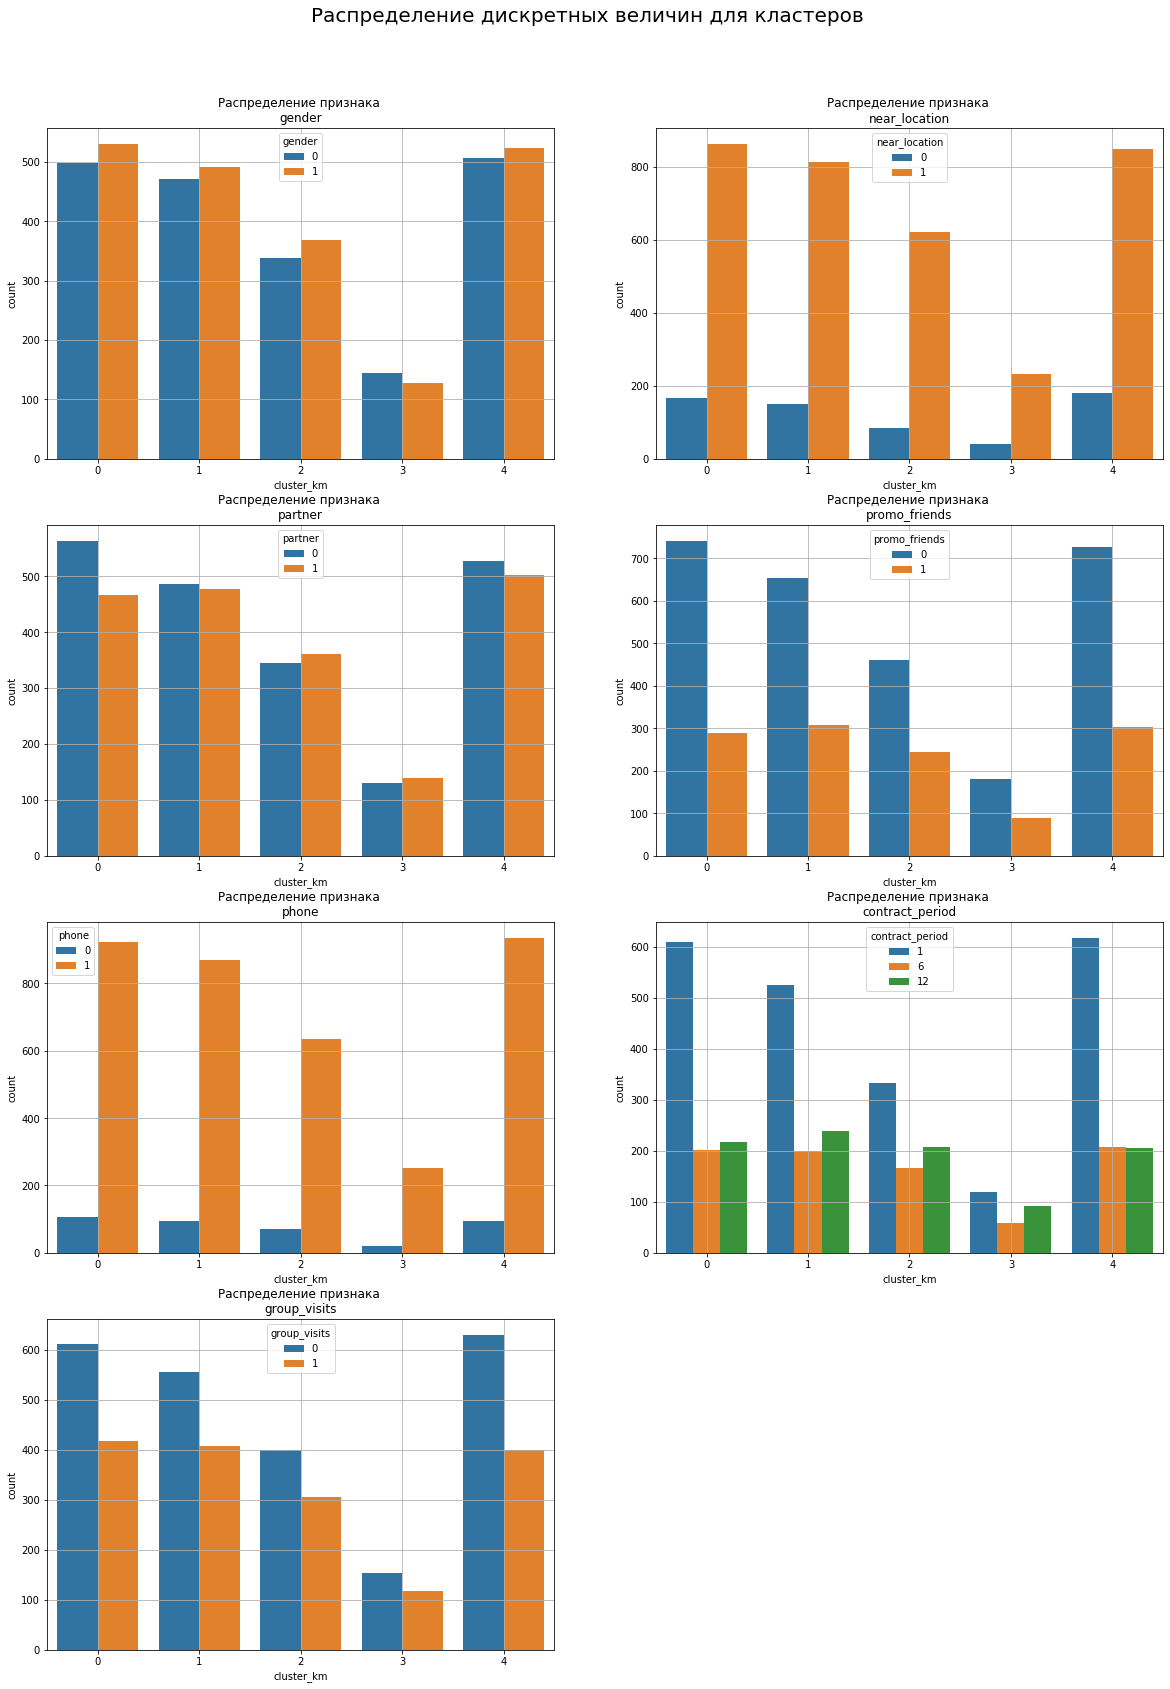

In [21]:
# нарисуем графики распределения признаков по кластерам для дискретных величин

# дискретные величины
disc_features = ['gender', 'near_location', 'partner', 
                 'promo_friends', 'phone', 'contract_period', 
                 'group_visits']

# нарисуем графики
for i, col in enumerate(disc_features):
    plt.subplot(4, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(20, 28)
    sns.countplot(data = gym.drop('churn', axis=1), x = 'cluster_km', hue = col)
    plt.grid(True)
    plt.title('Распределение признака \n'+ str(col))
    fig.suptitle('Распределение дискретных величин для кластеров', y = .94, fontsize=20)
plt.show();

#### Портреты клиентов на основании проведенной кластеризации.

#### Кластер 1
- Возраст - 29 лет;
- Проживает или работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера - да;
- Посещает групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 1 месяц;
- Срок действия текущего абонемента - 4 месяца;
- Время до окончания действующего абонемента - от 1 до 6 месяцев; 
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 месяца;
- Средняя частота посещений в неделю за предыдущий месяц - 1 раз;
- Выручка от дополнительных услуг фитнес-центра - 105 рублей.

---

#### Кластер 2
- Возраст - 29 лет;
- Проживает или работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера - да; 
- Посещает групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяца;
- Срок действия текущего абонемента - 5 месяцев;
- Время до окончания действующего абонемента - от 1 до 6 месяцев;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Выручка от дополнительных услуг фитнес-центра - 180 рублей.

---

#### Кластер 3
- Возраст - 29 лет;
- Проживает или работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера - нет;
- Посещает групповые занятия - нет;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяца;
- Срок действия текущего абонемента - 5 месяцев;
- Время до окончания действующего абонемента - от 1 до 8 месяцев - медианное значение - 5 месяцев;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Выручка от дополнительных услуг фитнес-центра - 250 рублей.

---

#### Кластер 4
- Возраст - 30 лет;
- Проживает или работает в районе, где находится фитнес-центр - нет;
- Сотрудник компании-партнера - да;
- Посещает Групповые занятия - да;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 3 месяц;
- Срок действия текущего абонемента - 6 месяцев;
- Время до окончания действующего абонемента - от 1 до 11 месяцев - медианное значение - 5 месяцев;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 1 раз;
- Выручка от дополнительных услуг фитнес-центра - 330 рублей;

---

#### Кластер 5
- Возраст - 29 лет;
- Проживает или работает в районе, где находится фитнес-центр - да;
- Сотрудник компании-партнера фитнес-центра - да;
- Посещает групповые занятия - выражены слабо;
- Запись в рамках акции "приведи друга" - выражена слабо;
- Наличие контактного телефона - да;
- Время с момента первого обращения в фитнес-центр - 2 месяца;
- Срок действия текущего абонемента - в среднем 1, 6 и 12 месяцев;
- Время до окончания действующего абонемента - 4 месяца; 
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза;
- Средняя частота посещений в неделю за предыдущий месяц - 2 раза;
- Выручка от дополнительных услуг фитнес-центра - 40 рублей.

In [22]:
# посчитаем долю оттока для каждого кластера
gym.groupby('cluster_km').agg({'churn' : 'mean'})

,churn
cluster_km,
0,0.333981
1,0.226376
2,0.178470
3,0.044280
4,0.350485


- Больше всего доля оттока в пятом кластере;
- Меньше всего доля оттока в четвертом кластере.

### <a id='step6'>Общий вывод</a>

#### Портрет среднестатистического клиента фитнес-центра
- Наши клиенты поровно распределены между мужчинами и женщинами;
- Почти 85% наших клиентов проживают или работают рядом с фитнес-центром;
- Почти половина клиентов работает в компаниях-партнерах и получает персональные предложения;
- Только 31% клиентов пришли по акции "приведи друга";
- В среднем, срок действия абонемента составляет 5 месяцев;
- Групповые занятия пользуются спросом у 41% клиентов:
- Средний возврат клиентов 29 лет;
- В среднем, клиенты тратят 150 рублей на дополнительные услуги;
- В среднем, клиент посещает фитнес-центр 2 раза в неделю.

---

#### К оттоку склонны клиенты, которые:
- Не проживают или не работают рядом с фитнес-центром;
- Чья компания не имееет партнерских отношений с фитнес-центром;
- Пришли в рамках программы "приведи друга";
- Оформляют абонемент только на один месяц;
- Не посещают групповые занятия;
- В возрасте до 25-26 лет;
- Не тратят деньги на кафе, сауны, массажный зал и другие услуги фитнес-центра;
- Ниже частота посещений в сравнении с теми, кто стал постоянными клиентам.

---

#### Рекомендации по работе с клиентами
Очевидно, что для того, чтобы клиенты не только начинали, но и продолжали пользоваться услугами наших фитнес-центров, становились постоянными клиентами, нужно выстроить грамотную система удержания клиентов. Например, так как у нас есть фитнес-центров, то необходимо открывать точку в разных районах, чтобы у большего количества людей была возможность пользоваться нашими услугами. Также необходимо развивать групповые тренировки, т.к они способствуют привлечению и удержанию. Для того, чтобы клиенты пользовались дополнительными услугами, можно ввести систему спецпредложений и других акций, например, бесплатное посещение массажиста при оформлении абонемента на срок более чем 6 месяцев. Так мы решим сразу две проблемы: привяжем клиентов к дополнительным услугам и простимулируем их сразу оформлять абонемент на большие сроки. Также стоит продолжать развивать взамодействие с различными компаниями-партнерами и искать новых. Это очень эффективная практика по привлечению новых клиентов.